
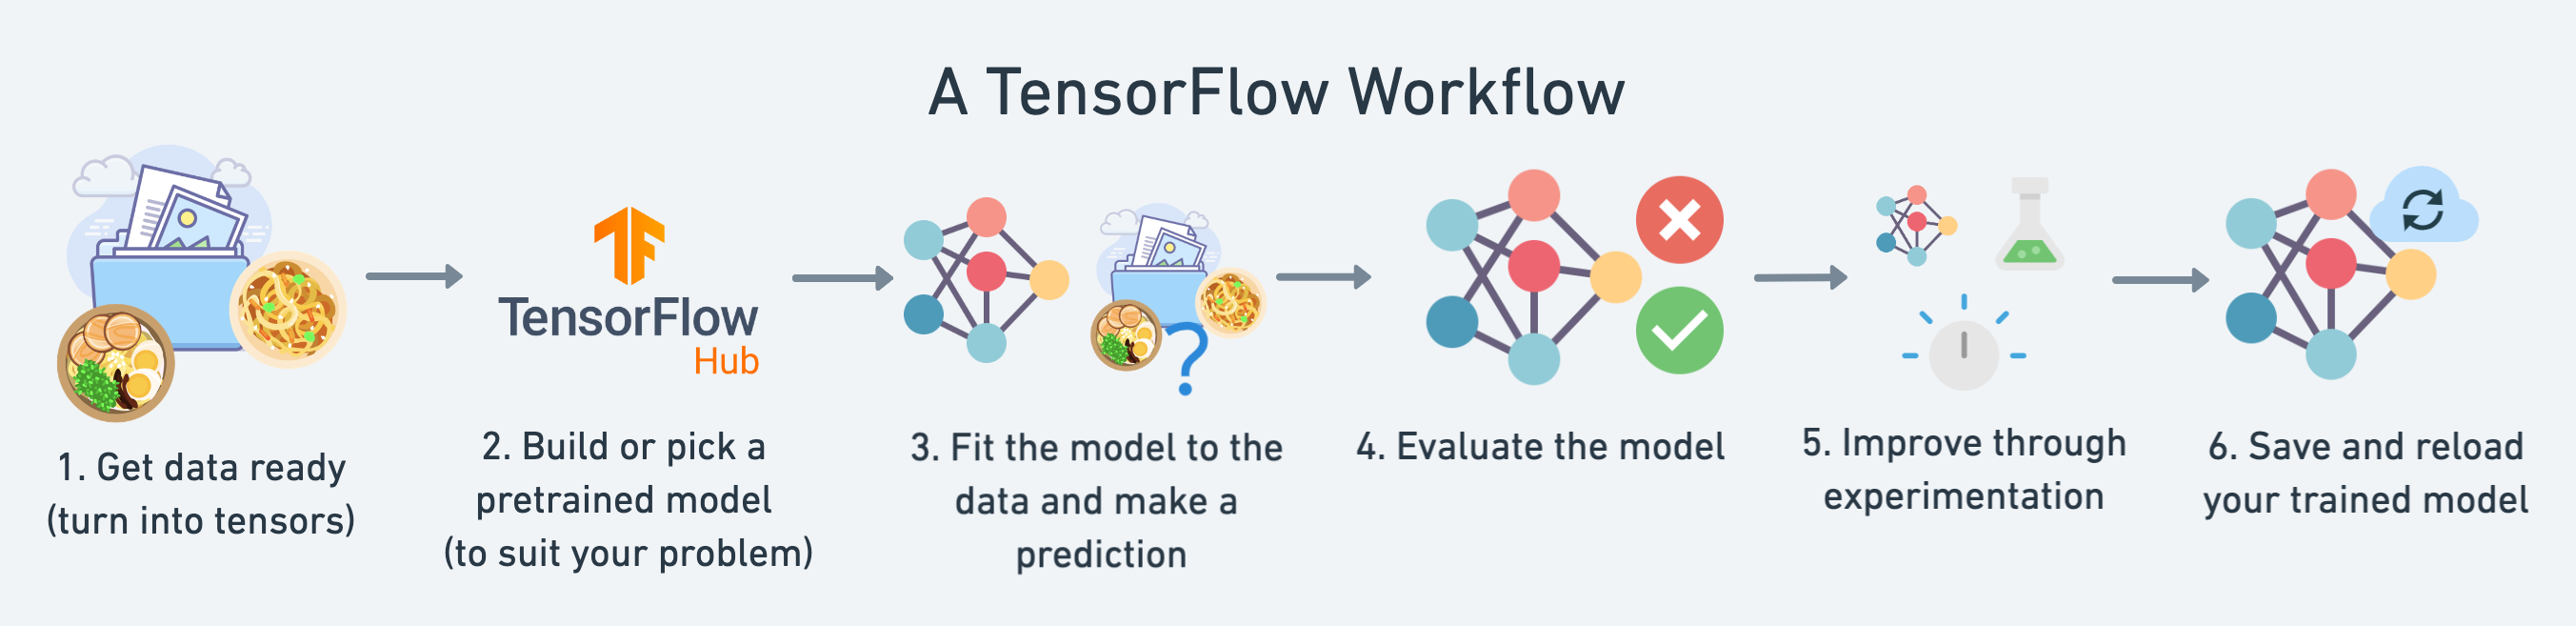


# 1.Get the Data


* Become one with the data (visualize, visualize, visualize...)
* Preprocess the data (prepare it for a model)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model (try to beat your baseline)
* Repeat until satisfied


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-08-20 15:29:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   102MB/s    in 5.6s    

2021-08-20 15:30:02 (87.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


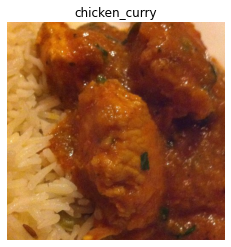

In [6]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

# 2.Peprocess the data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                   target_size=(224,224),
                                   batch_size=32,
                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [27]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

# 3.Create a Model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
  Conv2D(10, 3, activation="relu",input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 4.Fit the Model

In [9]:
history = model.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 86s 240ms/step - loss: 2.2145 - accuracy: 0.1829 - val_loss: 2.0936 - val_accuracy: 0.2560
Epoch 2/5
235/235 [==============================] - 55s 234ms/step - loss: 1.9225 - accuracy: 0.3337 - val_loss: 2.0070 - val_accuracy: 0.2856
Epoch 3/5
235/235 [==============================] - 56s 237ms/step - loss: 1.4970 - accuracy: 0.4977 - val_loss: 2.0465 - val_accuracy: 0.3108
Epoch 4/5
235/235 [==============================] - 56s 238ms/step - loss: 0.8822 - accuracy: 0.7119 - val_loss: 2.6337 - val_accuracy: 0.2760
Epoch 5/5
235/235 [==============================] - 56s 238ms/step - loss: 0.3456 - accuracy: 0.8967 - val_loss: 3.6222 - val_accuracy: 0.2752


# 5.Evaluate the Model

In [10]:
model.evaluate(test_data)

79/79 [==============================] - 13s 163ms/step - loss: 3.6222 - accuracy: 0.2752


[3.6221659183502197, 0.2752000093460083]

In [11]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

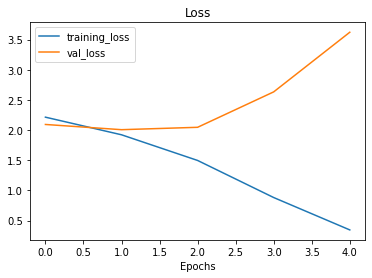

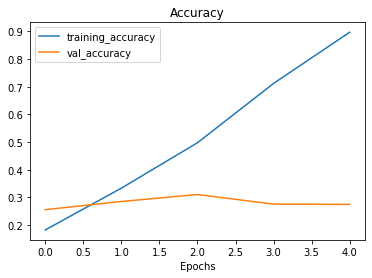

In [12]:
plot_loss_curves(history)

# 6.Adjust model parameters


* Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [14]:
simplified_model = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="sigmoid")
])

simplified_model.compile(loss="categorical_crossentropy",
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

In [15]:
simplified_history = simplified_model.fit(train_data,
                                          epochs=5,
                                          steps_per_epoch=len(train_data),
                                          validation_data=test_data,
                                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 216ms/step - loss: 2.2158 - accuracy: 0.2043 - val_loss: 2.0180 - val_accuracy: 0.2972
Epoch 2/5
235/235 [==============================] - 50s 214ms/step - loss: 1.8238 - accuracy: 0.3773 - val_loss: 1.8779 - val_accuracy: 0.3552
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 1.4984 - accuracy: 0.5033 - val_loss: 1.9156 - val_accuracy: 0.3256
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 1.0299 - accuracy: 0.6771 - val_loss: 2.1388 - val_accuracy: 0.3384
Epoch 5/5
235/235 [==============================] - 50s 214ms/step - loss: 0.5820 - accuracy: 0.8369 - val_loss: 2.3682 - val_accuracy: 0.3264


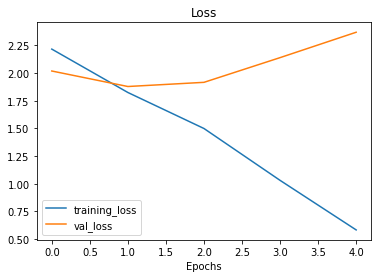

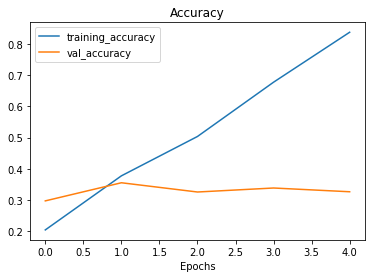

In [16]:
plot_loss_curves(simplified_history)

Our model didnt get better when removing layers, so we can now try data augmentation, with the first model

Data Augmentation

In [17]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [18]:
model_aug = tf.keras.models.clone_model(model)
model_aug.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [19]:
history_aug = model_aug.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 133s 563ms/step - loss: 2.1855 - accuracy: 0.1947 - val_loss: 2.0417 - val_accuracy: 0.2532
Epoch 2/5
235/235 [==============================] - 133s 566ms/step - loss: 2.0638 - accuracy: 0.2617 - val_loss: 1.9824 - val_accuracy: 0.3240
Epoch 3/5
235/235 [==============================] - 132s 562ms/step - loss: 2.0339 - accuracy: 0.2831 - val_loss: 1.9589 - val_accuracy: 0.3092
Epoch 4/5
235/235 [==============================] - 130s 555ms/step - loss: 1.9771 - accuracy: 0.3197 - val_loss: 1.8370 - val_accuracy: 0.3724
Epoch 5/5
235/235 [==============================] - 131s 556ms/step - loss: 1.9364 - accuracy: 0.3281 - val_loss: 1.8791 - val_accuracy: 0.3664


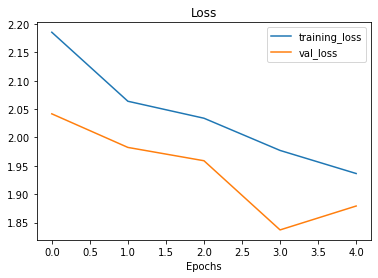

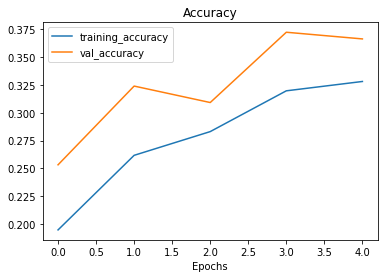

In [22]:
plot_loss_curves(history_aug)

# 7.Make prediction

In [23]:


# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg



In [30]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

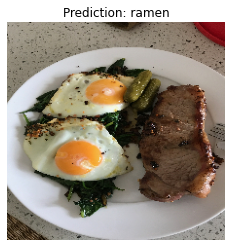

In [31]:
pred_and_plot(model=model_aug, 
              filename="03-steak.jpeg", 
              class_names=class_names)

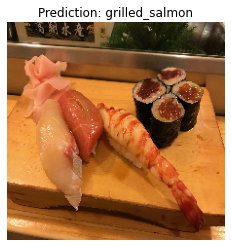

In [32]:
pred_and_plot(model=model_aug, 
              filename="03-sushi.jpeg", 
              class_names=class_names)